# Group Name & numer: DLNK, #26
## Group members:
Natiq Khan (nak9135@nyu.edu)\
David Lopez (dld388@nyu.edu)

Our project is divided into 4 notebooks, each serving its own unique function:
1. Notebook-1: Data retrieval and loading
2. Notebook-2: Data cleaning and standardizing
3. **→Notebook-3: Exploratory analysis and visualizations**
4. Notebook-4: Machine Learning and predictions

We made each notebook in keeping with the principles of **modularization and testing**. As well as **abstraction**, which made it easier to share our work between members seamlessly. 

Data cleaning and aggregation was done in ***Notebook-2***. Before you proceed with Notebook-3, please ensure you have the `final_data.csv` file in your working directory. 

# 3.1 Setup and loading the data:

In [1]:
# For analysis
import pandas as pd
import numpy as np
# For plots
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
# For interactable visualizations
import ipywidgets as widgets
from IPython.display import display

In [2]:
df = pd.read_csv("final_data.csv")

# 3.2 Overview of our dataset:

In [3]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2326 non-null   int64  
 1   game_id               2326 non-null   object 
 2   season                2326 non-null   int64  
 3   season_type           2326 non-null   object 
 4   week                  2326 non-null   int64  
 5   game_date             2326 non-null   object 
 6   home_team             2326 non-null   object 
 7   away_team             2326 non-null   object 
 8   final_home_score      2326 non-null   int64  
 9   final_away_score      2326 non-null   int64  
 10  score_diff            2326 non-null   int64  
 11  home_win              2326 non-null   int64  
 12  home_plays            2326 non-null   int64  
 13  home_pass_plays       2326 non-null   int64  
 14  home_rush_plays       2326 non-null   int64  
 15  home_yards_total     

,Unnamed: 0,game_id,season,season_type,week,game_date,home_team,away_team,final_home_score,final_away_score,...,away_epa_mean,away_success_rate,away_touchdowns,away_interceptions,away_fumbles_lost,away_explosive_plays,underdog_win,underdog_team,spread_home,spread_away
count,2326.000000,2326,2326.000000,2326,2326.000000,2326,2326,2326,2326.000000,2326.000000,...,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000,2326,2326.000000,2326.000000
unique,NaN,2326,NaN,2,NaN,506,29,29,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,NaN,NaN
top,NaN,2005_01_ARI_NYG,NaN,REG,NaN,2012-01-01,IND,BAL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLE,NaN,NaN
freq,NaN,1,NaN,2222,NaN,14,92,93,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117,NaN,NaN
mean,1162.500000,NaN,2010.009028,NaN,9.545572,NaN,NaN,NaN,23.276010,20.777730,...,-0.013780,0.439377,2.337059,0.987962,0.677128,3.483663,0.289338,NaN,-2.486887,2.540198
std,671.602685,NaN,3.163829,NaN,5.305168,NaN,NaN,NaN,10.455452,10.076868,...,0.158052,0.064741,1.390559,1.025621,0.842557,1.848554,0.453553,NaN,5.893731,5.896162
min,0.000000,NaN,2005.000000,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,...,-0.565066,0.242424,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-26.500000,-18.500000
25%,581.250000,NaN,2007.000000,NaN,5.000000,NaN,NaN,NaN,16.000000,13.000000,...,-0.118137,0.394737,1.000000,0.000000,0.000000,2.000000,0.000000,NaN,-6.500000,-2.500000
50%,1162.500000,NaN,2010.000000,NaN,10.000000,NaN,NaN,NaN,23.000000,20.000000,...,-0.006757,0.439024,2.000000,1.000000,0.000000,3.000000,0.000000,NaN,-3.000000,3.000000
75%,1743.750000,NaN,2013.000000,NaN,14.000000,NaN,NaN,NaN,30.000000,27.000000,...,0.095097,0.482759,3.000000,2.000000,1.000000,5.000000,1.000000,NaN,3.000000,6.500000


Most of our columns are either `int64` or `float64` data types with 6 columns storing text being `object`s. 

The `Unnamed: 0` column is the index assigned it got when we saved our data as a CSV. This is of no use for our analysis: so we can simply drop it:

In [4]:
df = df.drop(columns=["Unnamed: 0"])

# 3.3 Underdog analysis:

In [5]:
df['underdog_win'].value_counts(normalize=True)

0.0    0.710662
1.0    0.289338
Name: underdog_win, dtype: float64

About 28% of games result with an underdog victory. 

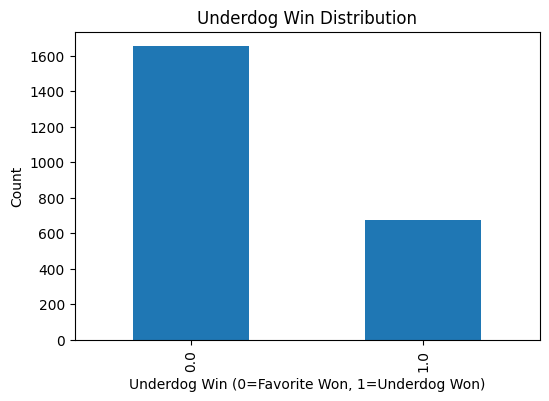

In [6]:
plt.figure(figsize=(6,4))
df['underdog_win'].value_counts().plot(kind='bar')
plt.title("Underdog Win Distribution")
plt.xlabel("Underdog Win (0=Favorite Won, 1=Underdog Won)")
plt.ylabel("Count")
plt.show()

## Underdog wins overtime
Let's see how underdog win frequency has changed over the years.

## Underdog-win rates overtime:

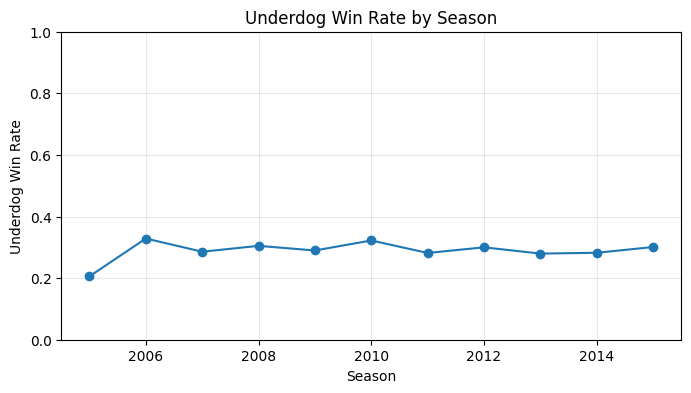

In [7]:
# 1) Trend of underdog win rate over seasons

ud_by_season = df.groupby("season")["underdog_win"].mean()

plt.figure(figsize=(8, 4))
plt.plot(ud_by_season.index, ud_by_season.values, marker="o")
plt.title("Underdog Win Rate by Season")
plt.xlabel("Season")
plt.ylabel("Underdog Win Rate")
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.show()

Over the course of the ten years, underdog wins have hovered around ~30%, with its highest point in 2006 exceeding 32% and it's lowest in 2005 at 21%. 

## Underdog wins by season, by team:

In [8]:
# Teams that have ever been an underdog

# drop NaN values again, just to be safe
ud_teams = sorted(df["underdog_team"].dropna().unique())

team_dropdown = widgets.Dropdown(
    options=ud_teams,
    value=ud_teams[0],
    description="Team:",
    layout=widgets.Layout(width="200px")
)

out_ud = widgets.Output()

def update_underdog_wins(change=None):
    """
    Update the interactive underdog-wins plot when the user selects a team.

    This function:
      - Reads the selected team from the dropdown widget.
      - Filters the main DataFrame (`df`) to games where that team was the underdog.
      - Computes total underdog games and underdog wins per season.
      - Aligns seasons so missing years show as zero wins.
      - Plots a bar chart of underdog wins by season.
      - Overlays a line plot of underdog win rate for the same seasons.
      - Renders the result inside the `out_ud` widget output area.

    Parameters
    ----------
    change : dict or None, optional
        Widget callback parameter (unused). Present to comply with ipywidgets'
        `.observe()` interface.
    """
    with out_ud:
        out_ud.clear_output()
        
        team = team_dropdown.value
        
        # All games where this team was the underdog
        sub = df[df["underdog_team"] == team]
        if sub.empty:
            print(f"No underdog games found for {team}.")
            return
        
        # Underdog games per season
        total_by_season = sub.groupby("season")["underdog_win"].count()
        wins_by_season = sub[sub["underdog_win"] == 1].groupby("season")["underdog_win"].count()
        
        # Align indices so missing seasons show as 0 wins
        wins_by_season = wins_by_season.reindex(total_by_season.index, fill_value=0)
        
        # Underdog win rate per season
        win_rate = wins_by_season / total_by_season
        
        seasons = total_by_season.index.values
        
        fig, ax1 = plt.subplots(figsize=(10,5))
        
        # Bar: count of underdog wins
        bars = ax1.bar(seasons, wins_by_season.values, width=0.6, alpha=0.7, label="Underdog Wins")
        ax1.set_xlabel("Season")
        ax1.set_ylabel("Underdog Wins (Count)")
        ax1.set_title(f"{team} – Underdog Wins by Season")
        
        # Integer y ticks
        ax1.set_yticks(range(0, int(wins_by_season.max()) + 1))

        # Show every season
        ax1.set_xticks(seasons)
        ax1.set_xticklabels(seasons, rotation=45)

        # Overlay win rate on second axis
        ax2 = ax1.twinx()
        line = ax2.plot(seasons, win_rate.values, marker="o", linestyle="-", alpha=0.7, linewidth=2, label="Underdog Win Rate")
        ax2.set_ylabel("Underdog Win Rate")
        ax2.set_ylim(0, 1)

        # ---------- NEW: Legend ----------
        # We have bars on ax1 and line on ax2, so we combine legend handles
        handles1, labels1 = ax1.get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(handles1 + handles2, labels1 + labels2, loc="upper left")

        plt.tight_layout()
        plt.show()

team_dropdown.observe(update_underdog_wins, names="value")

update_underdog_wins()
display(widgets.VBox([team_dropdown, out_ud]))

For most teams, we see a strong correlation between more underdog wins and a higher overall win rate. 

## Underdog wins by magnitude

Corrected Underdog Win Rate (Straight Up): 28.93%
Negative underdog spreads: 0

Win Rate by Spread Bin:
  spread_bin  underdog_win
0        0-3      0.394366
1        3-7      0.319221
2       7-10      0.213152
3      10-14      0.148148
4        14+      0.032258


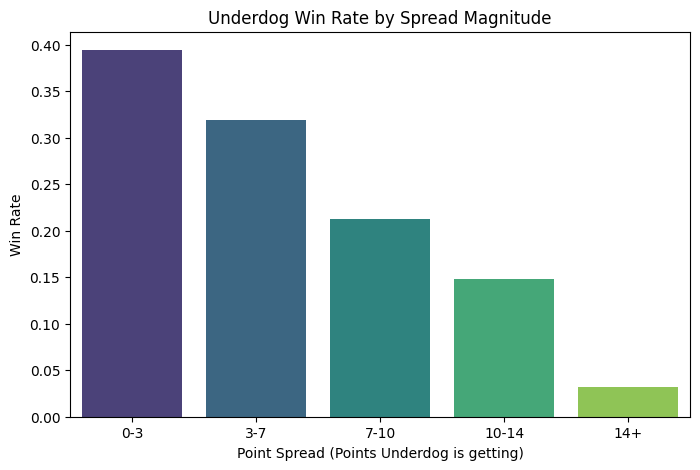

In [ ]:
# Filter for valid underdogs
df_dogs = df.dropna(subset=['underdog_team']).copy()

# Correct Overall Win Rate
corrected_dog_win_rate = df_dogs['underdog_win'].mean()
print(f"Corrected Underdog Win Rate (Straight Up): {corrected_dog_win_rate:.2%}")

# Determine the spread value for the underdog
# If home team is underdog, use spread_home. If away team is underdog, use spread_away.
# We expect these to be positive.
df_dogs['underdog_spread'] = df_dogs.apply(
    lambda x: x['spread_home'] if x['home_team'] == x['underdog_team'] else x['spread_away'], axis=1
)

# Check if there are negative underdog spreads (shouldn't be, unless data issue or pick'em handled oddly)
print("Negative underdog spreads:", (df_dogs['underdog_spread'] < 0).sum())

# Bin the spreads
bins = [0, 3, 7, 10, 14, 30]
labels = ['0-3', '3-7', '7-10', '10-14', '14+']
df_dogs['spread_bin'] = pd.cut(df_dogs['underdog_spread'], bins=bins, labels=labels, right=False)

# Win rate by spread bin
bin_win_rates = df_dogs.groupby('spread_bin')['underdog_win'].mean().reset_index()
print("\nWin Rate by Spread Bin:")
print(bin_win_rates)

# Visualize Bin Win Rates
plt.figure(figsize=(8, 5))

sns.barplot(
    data=bin_win_rates,
    x='spread_bin',
    y='underdog_win',
    hue='spread_bin',
    palette='viridis',
    legend=False
)

plt.title('Underdog Win Rate by Spread Magnitude')
plt.xlabel('Point Spread (Points Underdog is getting)')
plt.ylabel('Win Rate')

As you would expect, most underdog wins are very close matches. With a victory of 0-3 points being the most common, with a decreasing trend until and an underdog winning by more than 14 points being extremely rare. 

## Underdog winning by team

We chose to use seaborn for some of these plots, to better communicate meaning of each plot. 

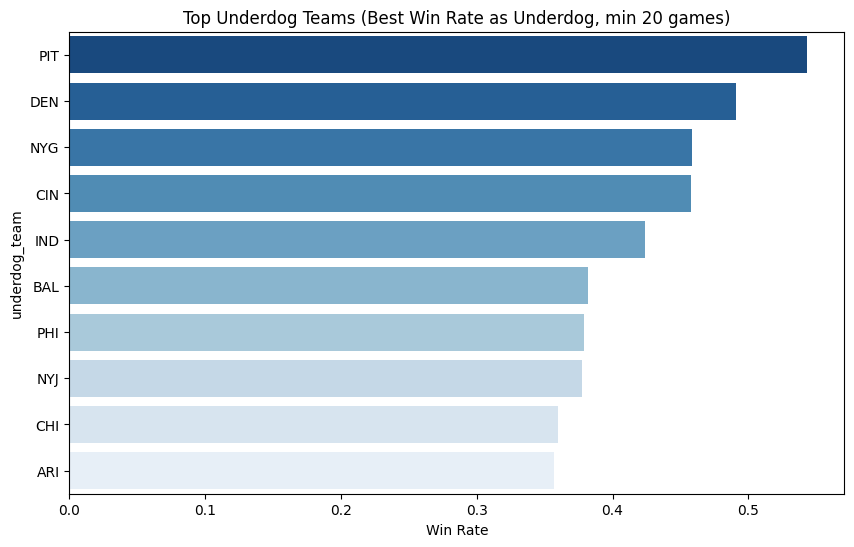

In [10]:
# Best Underdogs (Teams)
# Count games as underdog and wins
team_dog_stats = df_dogs.groupby('underdog_team').agg(
    games=('underdog_win', 'count'),
    wins=('underdog_win', 'sum')
).reset_index()
team_dog_stats['win_rate'] = team_dog_stats['wins'] / team_dog_stats['games']

# Filter for teams with at least 20 games as underdog (approx 2 seasons worth)
top_underdogs = team_dog_stats[team_dog_stats['games'] >= 20].sort_values('win_rate', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_underdogs,
    x='win_rate',
    y='underdog_team',
    hue='underdog_team',
    palette='Blues_r',
    legend=False
)
plt.title('Top Underdog Teams (Best Win Rate as Underdog, min 20 games)')
plt.xlabel('Win Rate')

# Identify Favorite Team
df_dogs['favorite_team'] = df_dogs.apply(
    lambda x: x['away_team'] if x['home_team'] == x['underdog_team'] else x['home_team'], axis=1
)

To the surprise of no NFL fan, the Pittsburgh Steelers had surprisngly strong performance during 2005-2015, with a greater than 50% win rate in matches where they were the underdog. Closely followed by the Denver Broncos who actually were rarely even considered the underdogs in some seasons. 

## Upsets (underdog losses) by teams

Text(0.5, 0, 'Upset Loss Rate')

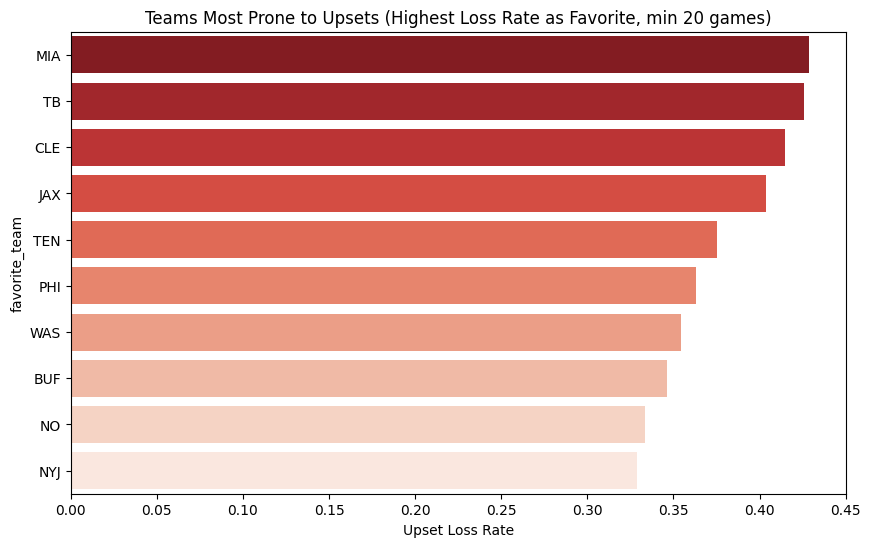

In [11]:
# Worst Favorites (Teams that lost most often to underdogs)
# We look at games where they were favorites (i.e., opponents were underdogs)
# Loss for favorite = Win for underdog
fav_stats = df_dogs.groupby('favorite_team').agg(
    games_as_fav=('underdog_win', 'count'),
    upset_losses=('underdog_win', 'sum')
).reset_index()
fav_stats['upset_rate'] = fav_stats['upset_losses'] / fav_stats['games_as_fav']

# Filter for teams often favored
worst_favorites = fav_stats[fav_stats['games_as_fav'] >= 20].sort_values('upset_rate', ascending=False).head(10)

plt.figure(figsize=(10, 6))

sns.barplot(
    data=worst_favorites,
    x='upset_rate',
    y='favorite_team',
    hue='favorite_team',
    palette='Reds_r',
    legend=False
)

plt.title('Teams Most Prone to Upsets (Highest Loss Rate as Favorite, min 20 games)')
plt.xlabel('Upset Loss Rate')

The Cleveland Browns and Miami Dolphins had some of the most upsets during this time period, signifying a lackluster performance during 2005-2015, which is no secret to any NFL fan. 

# 3.4 Let's look at how spreads and score differentials behave:

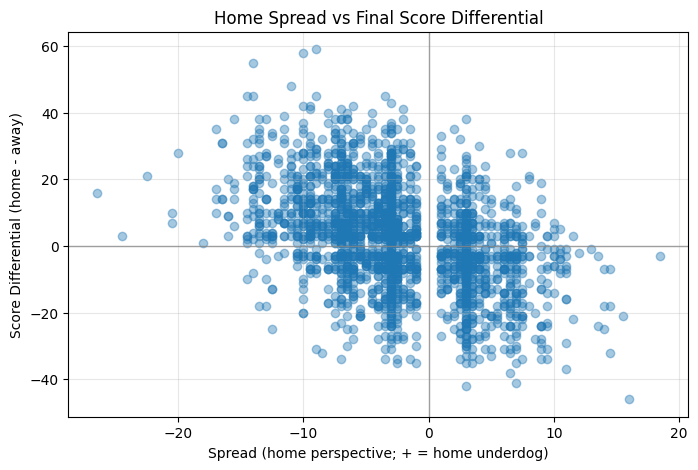

In [12]:
# 2) Scatterplot of home spread vs score differential

df["score_diff"] = df["final_home_score"] - df["final_away_score"]

plt.figure(figsize=(8, 5))
plt.scatter(df["spread_home"], df["score_diff"], alpha=0.4)
plt.title("Home Spread vs Final Score Differential")
plt.xlabel("Spread (home perspective; + = home underdog)")
plt.ylabel("Score Differential (home - away)")
plt.axhline(0, color="gray", linewidth=1, alpha=0.7)
plt.axvline(0, color="gray", linewidth=1, alpha=0.7)
plt.grid(True, alpha=0.3)
plt.show()



We can see a slight correlation from the graph, however when quantified the correlation was quite weak... It is difficult to draw a strong conclusion from this alone...

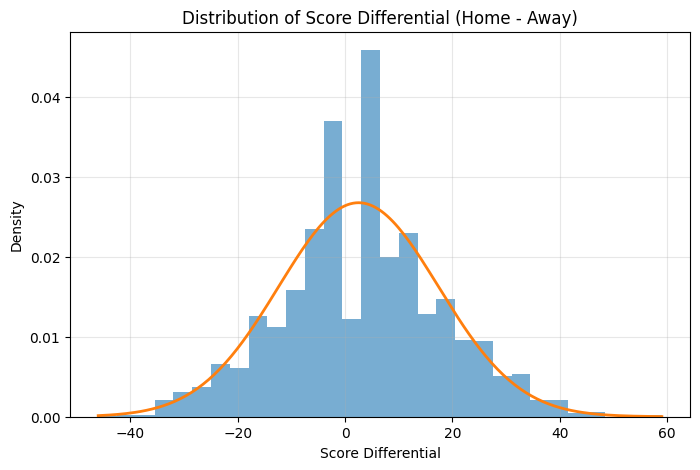

Gaussian fit: mean = 2.50, std = 14.92


In [13]:
# Distribution of score differentials

score_diff = df["score_diff"].dropna()

mu = score_diff.mean()
sigma = score_diff.std()

plt.figure(figsize=(8, 5))

# Histogram as density
count, bins, _ = plt.hist(score_diff, bins=30, density=True, alpha=0.6)

# Gaussian curve over same range
x = np.linspace(bins[0], bins[-1], 200)
gauss = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
plt.plot(x, gauss, linewidth=2)

plt.title("Distribution of Score Differential (Home - Away)")
plt.xlabel("Score Differential")
plt.ylabel("Density")
plt.grid(True, alpha=0.3)
plt.show()

print(f"Gaussian fit: mean = {mu:.2f}, std = {sigma:.2f}")

This shows an interesting distribution: the data appears to be following a gaussian distribution, but with a sharp dip at zero. 
The reason zero is very rare is because if an NFL game ends with equal scores, the game simply goes into overtime. If the game remains tied even after overtime, only then it is counted as a tie. 

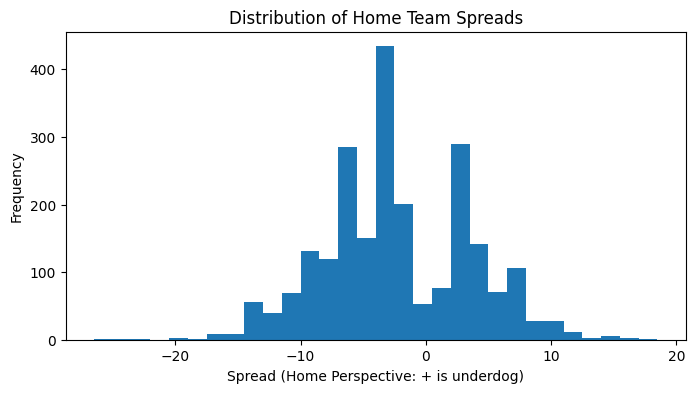

In [14]:
plt.figure(figsize=(8,4))
plt.hist(df['spread_home'], bins=30)
plt.title("Distribution of Home Team Spreads")
plt.xlabel("Spread (Home Perspective: + is underdog)")
plt.ylabel("Frequency")
plt.show()

Similar to what see above, it seems the money spread distribution resembled a normal distribution's skew, except with a dip near zero. This could likely be because people very rarely consider two teams to be equal (possibly due to personal bias or because ties are so rare in the NFL).\
There also appears to be a slight left-skew, however it is not prominent enough to draw any meaningful conclusions. 

# 3.5 Correlation Matrix to see trends between variables:

Next, let's visualize all of these correlations with a correlation matrix heatmap:

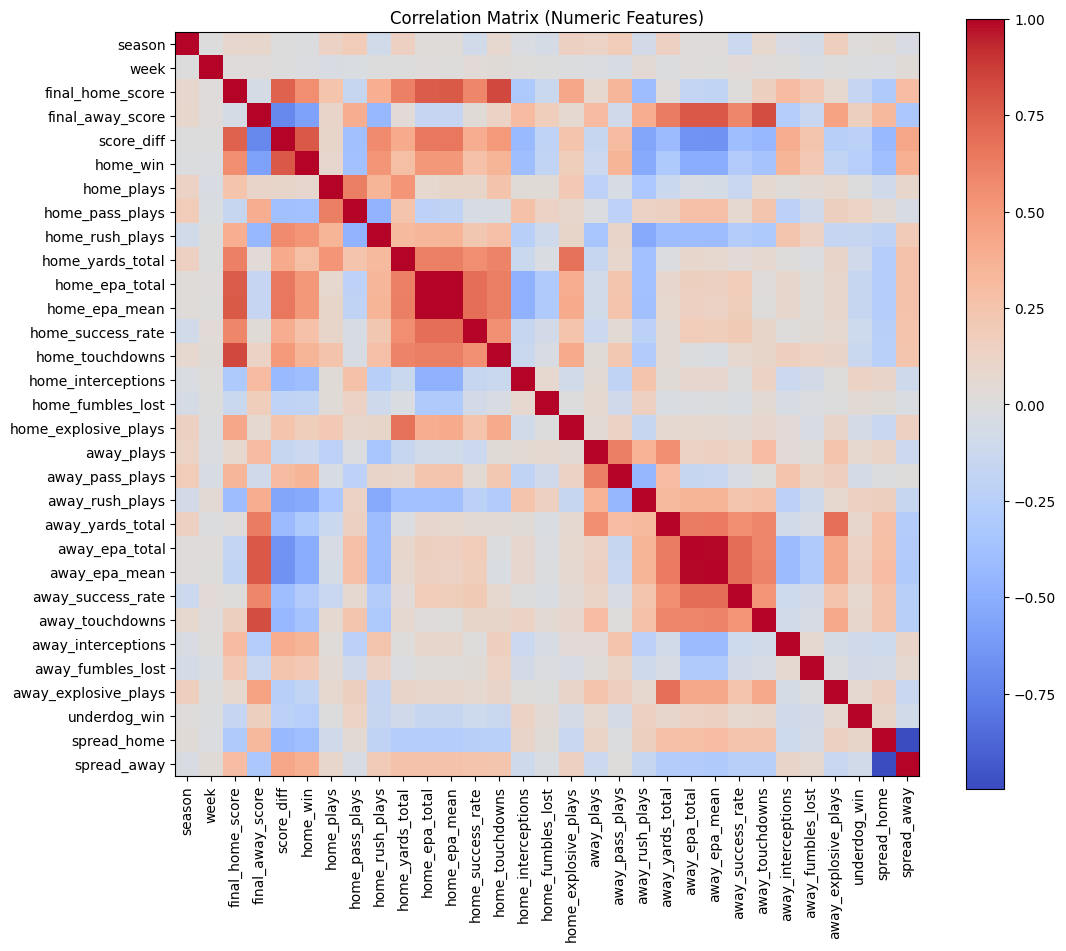

In [15]:
numeric_cols = df.select_dtypes(include='number')
corr = numeric_cols.corr()

plt.figure(figsize=(12,10))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Correlation Matrix (Numeric Features)")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [16]:
# First, let's find and print the highest correlation pairs
corr = numeric_cols.corr()
pairs = (
    corr.where(~np.eye(corr.shape[0], dtype=bool))
        .unstack()
        .dropna()
        .abs()
        .sort_values(ascending=False)
)
top_corr_pairs = pairs.head(20)

top_corr_pairs_df = top_corr_pairs.reset_index()
top_corr_pairs_df.columns = ["Feature A", "Feature B", "Correlation"]
top_corr_pairs_df

,Feature A,Feature B,Correlation
0,spread_away,spread_home,0.996377
1,spread_home,spread_away,0.996377
2,home_epa_mean,home_epa_total,0.992546
3,home_epa_total,home_epa_mean,0.992546
4,away_epa_mean,away_epa_total,0.991525
5,away_epa_total,away_epa_mean,0.991525
6,final_home_score,home_touchdowns,0.836195
7,home_touchdowns,final_home_score,0.836195
8,final_away_score,away_touchdowns,0.815195
9,away_touchdowns,final_away_score,0.815195


A lot of the stronger correlations make perfect sense, for example:
1. `spread_away` against `spread_home` makes perfect sense as they are meant to be opposites of each other and any deviation is a chance to make money, so the market adjusts very quickly. 
2. `final_home_score` with `home_touchdowns`: obviously because of the way NFL works, more touchdowns means you're scoring more points, so it is naturally expected that teams that have more touchdowns would also tend to have higher final scores. 
3. `final_home_score` with `home_epa_total`: similar to what we see with touchdowns, higher EPA also hints at a team playing better, and thus ending with a higher score. 

# 3.6 EPA difference vs outcome:

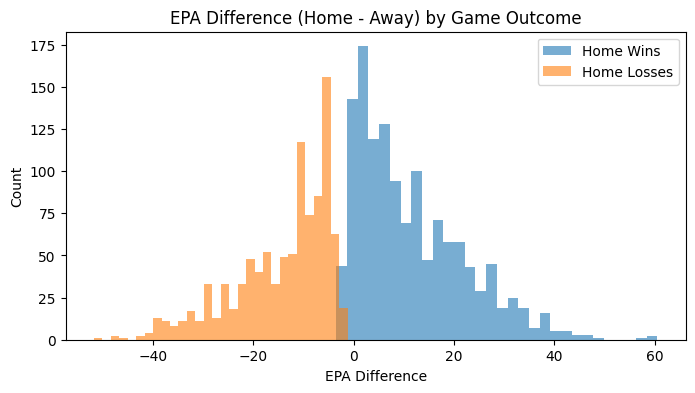

In [17]:
df['epa_diff'] = df['home_epa_total'] - df['away_epa_total']

plt.figure(figsize=(8,4))
plt.hist(df[df['home_win']==1]['epa_diff'], bins=30, alpha=0.6, label='Home Wins')
plt.hist(df[df['home_win']==0]['epa_diff'], bins=30, alpha=0.6, label='Home Losses')
plt.legend()
plt.title("EPA Difference (Home - Away) by Game Outcome")
plt.xlabel("EPA Difference")
plt.ylabel("Count")
plt.show()

This is quite straightforward, the blue bars showing the EPA surplus of a team when it wins and the orange bars showing the EPA deficit of a team when it loses. It should be obvious why they flip at zero, with some overlap at that point.\
Once again, we see the same "valley" at zero, showing how games rarely end in ties. 

# 3.7 Spread vs outcome

<Figure size 700x400 with 0 Axes>

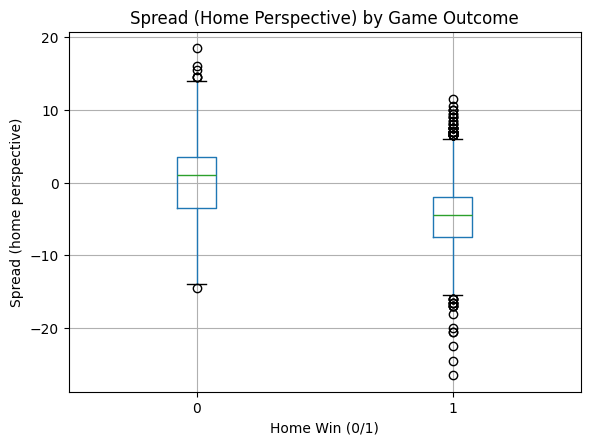

In [18]:
plt.figure(figsize=(7,4))
df.boxplot(column='spread_home', by='home_win')
plt.title("Spread (Home Perspective) by Game Outcome")
plt.suptitle("")
plt.xlabel("Home Win (0/1)")
plt.ylabel("Spread (home perspective)")
plt.show()

When the home team wins, the point spread tends to be negative, meaning the home team was favored.
The spreads in these games show a wider range because favorites can vary from small to large.

When the home team loses, the spread tends to be positive, meaning the home team was the underdog.
These spreads cluster tightly because underdogs are typically small home underdogs (e.g., +1 to +7), and very large home underdogs are rare.

# 3.8 How real is home-field advantage?

In [19]:
home_win_rate = df['home_win'].mean()
home_win_rate

0.5709372312983663

Teams playing in their home-field win around 57% of their games. 

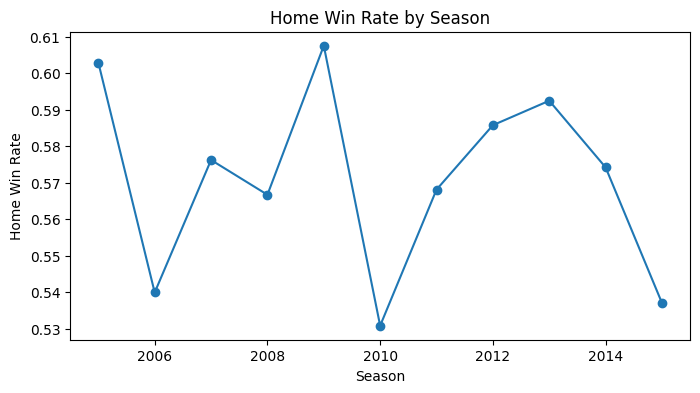

In [20]:
home_by_year = df.groupby('season')['home_win'].mean()

plt.figure(figsize=(8,4))
plt.plot(home_by_year.index, home_by_year.values, marker='o')
plt.title("Home Win Rate by Season")
plt.xlabel("Season")
plt.ylabel("Home Win Rate")
plt.show()

The rate of Home-Wins has fluctuated a bit over the years, however it has stayed above 50% throughout, suggesting there is an advantage present. 

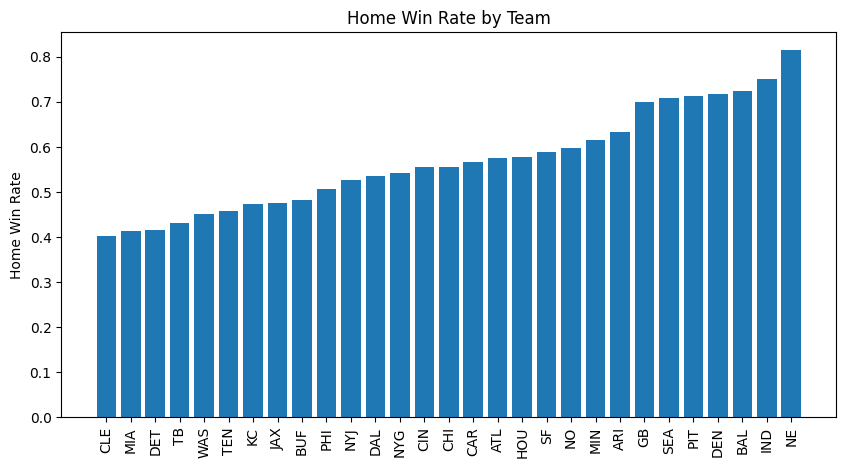

In [21]:
home_by_team = df.groupby('home_team')['home_win'].mean().sort_values()

plt.figure(figsize=(10,5))
plt.bar(home_by_team.index, home_by_team.values)
plt.xticks(rotation=90)
plt.title("Home Win Rate by Team")
plt.ylabel("Home Win Rate")
plt.show()

The New England Patriots seem to have had the most prominent "home-field" advantage, with them winning around 80% of all games they played in their home field. 
While the Cleveland browns performed the weakest in their home-field with only a 40% rate, although their overall lackluster performance may be to blame in this case. 

# 3.9 Explosive plays and victory:

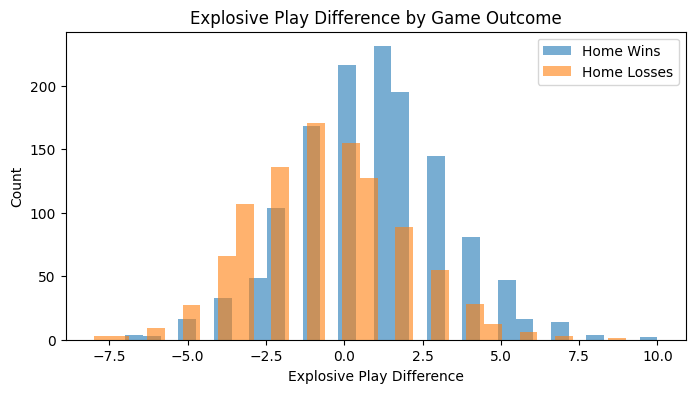

In [22]:
df['explosive_diff'] = df['home_explosive_plays'] - df['away_explosive_plays']

plt.figure(figsize=(8,4))
plt.hist(df[df['home_win']==1]['explosive_diff'], bins=30, alpha=0.6, label='Home Wins')
plt.hist(df[df['home_win']==0]['explosive_diff'], bins=30, alpha=0.6, label='Home Losses')
plt.legend()
plt.title("Explosive Play Difference by Game Outcome")
plt.xlabel("Explosive Play Difference")
plt.ylabel("Count")
plt.show()

In the NFL, an **explosive play** is a play that gains a lot of yards at once and significantly increases scoring probability.\

The distribution of explosive play differentials shows that winning teams tend to generate more explosive plays than their opponents.

Home wins cluster around positive explosive differentials (0 to +3), while home losses cluster around negative differentials (0 to –3).

This indicates that explosive plays are a strong contributor to game success, although games near zero show that they are not the only deciding factor.

Large differentials on either side reflect blowouts or highly unbalanced offensive performances.

One interesting takeaway is that even though winning teams tend to have more explosive plays than their opponents, it does not necessarily guarantee a win. But it does help their odds. 

# 3.10 Win probability, score differential vs EPA differential:

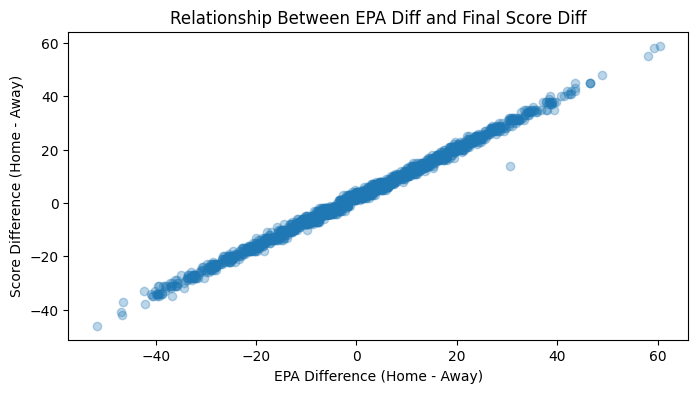

In [23]:
plt.figure(figsize=(8,4))
plt.scatter(df['epa_diff'], df['score_diff'], alpha=0.3)
plt.title("Relationship Between EPA Diff and Final Score Diff")
plt.xlabel("EPA Difference (Home - Away)")
plt.ylabel("Score Difference (Home - Away)")
plt.show()

As expected, we see a very strong linear correlation between EPA difference and score differences. This graph still helps visualize this relationship well and was satisfying to plot. 

# 3.11 Interactable plots:
In this section, we made use of `ipywidgets` in order to make interactable, dashboard-like, plots. 

First, we need to manipulate our data to get one row per team, per year, while keeping information about their plays over the years. Essentially, aggregating.

In [24]:
df = pd.read_csv("final_data.csv")

# Combine home + away stats into unified team-level view
teams = []

for side in ["home", "away"]:
    tmp = df.copy()
    tmp["team"] = tmp[f"{side}_team"]
    tmp["plays"] = tmp[f"{side}_plays"]
    tmp["pass_plays"] = tmp[f"{side}_pass_plays"]
    tmp["rush_plays"] = tmp[f"{side}_rush_plays"]
    tmp["epa_total"] = tmp[f"{side}_epa_total"]
    tmp["epa_mean"] = tmp[f"{side}_epa_mean"]
    tmp["success_rate"] = tmp[f"{side}_success_rate"]
    tmp["touchdowns"] = tmp[f"{side}_touchdowns"]
    tmp["interceptions"] = tmp[f"{side}_interceptions"]
    tmp["fumbles_lost"] = tmp[f"{side}_fumbles_lost"]
    tmp["explosive_plays"] = tmp[f"{side}_explosive_plays"]
    tmp["score"] = np.where(side=="home", 
                            tmp["final_home_score"], 
                            tmp["final_away_score"])
    tmp["allowed_score"] = np.where(side=="home", 
                                    tmp["final_away_score"], 
                                    tmp["final_home_score"])
    tmp["season"] = tmp["season"]

    teams.append(tmp[[
        "team", "season", "plays", "pass_plays", "rush_plays", 
        "epa_total", "epa_mean", "success_rate", "touchdowns",
        "interceptions", "fumbles_lost", "explosive_plays",
        "score", "allowed_score", "spread_home", "underdog_win"
    ]])

team_df = pd.concat(teams, ignore_index=True)

# Aggregate to Team × Season
team_season = team_df.groupby(["team", "season"]).agg(
    games=("plays", "count"),
    plays=("plays", "sum"),
    pass_rate=("pass_plays", lambda x: x.sum() / x.count()),
    epa_mean=("epa_mean", "mean"),
    success_rate=("success_rate", "mean"),
    explosive_rate=("explosive_plays", lambda x: x.sum() / x.count()),
    turnover_rate=("interceptions", lambda x: (x.sum()) / x.count()),
    fumble_rate=("fumbles_lost", lambda x: x.sum() / x.count()),
    score_for=("score", "mean"),
    score_against=("allowed_score", "mean"),
    average_spread=("spread_home", "mean"),
    underdog_win_rate=("underdog_win", "mean"),
).reset_index()

team_season.head()

,team,season,games,plays,pass_rate,epa_mean,success_rate,explosive_rate,turnover_rate,fumble_rate,score_for,score_against,average_spread,underdog_win_rate
0,ARI,2005,14,1233,48.142857,-0.055995,0.436166,3.857143,1.428571,0.928571,18.642857,24.428571,-1.000000,0.071429
1,ARI,2006,12,1015,39.500000,-0.077504,0.427964,2.916667,1.000000,0.750000,19.750000,25.333333,-0.958333,0.166667
2,ARI,2007,13,1104,41.000000,-0.077194,0.442208,3.615385,1.461538,0.923077,22.692308,25.230769,-4.423077,0.307692
3,ARI,2008,18,1478,42.444444,0.031077,0.469663,3.611111,0.944444,0.888889,26.500000,27.333333,-1.888889,0.277778
4,ARI,2009,16,1282,40.312500,-0.018139,0.467883,3.375000,1.187500,1.000000,24.250000,24.500000,-2.000000,0.562500


### Below is the code for our first interactable plot which shows 4 plots in a 2x2 grid:
1. Average points vs EPA:
2. Pass rate vs EPA:
3. EPA vs. Average Spread:
4. EPA vs Interception rate:

In [ ]:
# Color map: assign a consistent RGBA color to each team
teams = sorted(team_season["team"].unique())
cmap = plt.get_cmap("tab20")
color_map = {team: cmap(i % cmap.N) for i, team in enumerate(teams)}

# Single multi-select widget controlling all 4 plots
team_selector_grid = widgets.SelectMultiple(
    options=teams,
    value=tuple(teams),  # start with all teams selected
    description="Teams",
    layout=widgets.Layout(width="200px", height="300px")
)

out_grid = widgets.Output()

# Update function: draws a 2x2 grid of scatter plots
def update_multi_panel(change=None):
    """
    Update a 2x2 grid of scatter plots based on the selected teams.

    The grid shows, for each team-season in the filtered data:

      (1) Average Points vs EPA
          x-axis: score_for
          y-axis: epa_mean

      (2) Pass Rate vs EPA
          x-axis: pass_rate
          y-axis: epa_mean

      (3) EPA vs Interception Rate
          x-axis: epa_mean
          y-axis: turnover_rate

      (4) EPA vs Average Spread
          x-axis: epa_mean
          y-axis: average_spread

    All four panels:
      - Use the same team color mapping (color_map).
      - Share a single legend showing only the selected teams.
      - Are controlled by a single SelectMultiple widget.

    Parameters
    ----------
    change : dict or None, optional
        Event info passed by ipywidgets `.observe()`. Unused here, but
        required for compatibility with the observer API.
    """
    with out_grid:
        out_grid.clear_output()
        
        # Control font size
        plt.rcParams.update({"axes.titlesize": 14, # title of each subplot
                     "axes.labelsize": 13, # axis labels for each plot
                     "xtick.labelsize": 12, # x ticks
                     "ytick.labelsize": 12}) # y ticks

        selected = list(team_selector_grid.value)
        if not selected:
            print("Select at least one team.")
            return

        # Filter to selected teams
        ts = team_season[team_season["team"].isin(selected)]

        # Map each row to its team color (RGBA)
        colors = ts["team"].map(color_map)

        # Create 2x2 grid of axes
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        ax_flat = axes.ravel()

        # Panel 1: Average Points vs EPA
        ax = ax_flat[0]
        ax.scatter(
            ts["score_for"],
            ts["epa_mean"],
            c=list(colors),
            s=60,
            alpha=0.9,
            marker="o",
        )
        ax.set_xlabel("Average Points Scored per Game")
        ax.set_ylabel("Average Offensive EPA per Play")
        ax.set_title("Points vs EPA (Per Team, Per Season)")

        # Panel 2: Pass Rate vs EPA
        ax = ax_flat[1]
        ax.scatter(
            ts["pass_rate"],
            ts["epa_mean"],
            c=list(colors),
            s=60,
            alpha=0.9,
            marker="o",
        )
        ax.set_xlabel("Pass Rate (fraction of plays that are passes)")
        ax.set_ylabel("Average Offensive EPA per Play")
        ax.set_title("Pass Rate vs EPA")

        # Panel 3: EPA vs Interception Rate
        ax = ax_flat[2]
        ax.scatter(
            ts["epa_mean"],
            ts["turnover_rate"],
            c=list(colors),
            s=60,
            alpha=0.9,
            marker="o",
        )
        ax.set_xlabel("Average Offensive EPA per Play")
        ax.set_ylabel("Interception Rate (approx.)")
        ax.set_title("EPA vs Interception Rate")

        # Panel 4: EPA vs Average Spread
        ax = ax_flat[3]
        ax.scatter(
            ts["epa_mean"],
            ts["average_spread"],
            c=list(colors),
            s=60,
            alpha=0.9,
            marker="o",
        )
        ax.set_xlabel("Average Offensive EPA per Play")
        ax.set_ylabel("Average Spread (home perspective)")
        ax.set_title("EPA vs Average Spread")

        # Shared legend for selected teams
        legend_elements = [
            Line2D(
                [0], [0],
                marker="o",
                linestyle="",
                markersize=8,
                color=color_map[team]
            )
            for team in selected
        ]

        fig.legend(
            legend_elements,
            selected,
            title="Teams",
            bbox_to_anchor=(1.02, 1),
            loc="upper left"
        )

        plt.tight_layout()
        plt.show()

# Attach the update function to changes in the selector
team_selector_grid.observe(update_multi_panel, names="value")

# Initial render
update_multi_panel()

# Display selector + 2x2 grid together
display(widgets.HBox([team_selector_grid, out_grid]))

# 3.12 Offensive vs Defensive identity map
First, we need to compute the offensive and defensive data summaries. 

In [26]:
# Build per-game defensive stats by mirroring opponent offense
def_sides = []

for side in ["home", "away"]:
    opp = "away" if side == "home" else "home"
    tmp = df.copy()
    tmp["team"] = tmp[f"{side}_team"]
    
    # EPA allowed per play = opponent's offensive EPA
    tmp["def_epa_mean"] = tmp[f"{opp}_epa_mean"]
    
    # Points allowed in that game
    tmp["def_points_allowed"] = np.where(
        side == "home",
        tmp["final_away_score"],
        tmp["final_home_score"]
    )
    
    def_sides.append(tmp[["team", "season", "def_epa_mean", "def_points_allowed"]])

team_def = pd.concat(def_sides, ignore_index=True)

# Aggregate to team × season
team_def_season = (
    team_def.groupby(["team", "season"])
            .agg(
                def_epa_allowed=("def_epa_mean", "mean"),
                points_allowed=("def_points_allowed", "mean"),
            )
            .reset_index()
)

# Merge with existing offensive team_season
team_id = team_season.merge(team_def_season, on=["team", "season"], how="left")
team_id.head()

,team,season,games,plays,pass_rate,epa_mean,success_rate,explosive_rate,turnover_rate,fumble_rate,score_for,score_against,average_spread,underdog_win_rate,def_epa_allowed,points_allowed
0,ARI,2005,14,1233,48.142857,-0.055995,0.436166,3.857143,1.428571,0.928571,18.642857,24.428571,-1.000000,0.071429,0.007424,24.428571
1,ARI,2006,12,1015,39.500000,-0.077504,0.427964,2.916667,1.000000,0.750000,19.750000,25.333333,-0.958333,0.166667,-0.013292,25.333333
2,ARI,2007,13,1104,41.000000,-0.077194,0.442208,3.615385,1.461538,0.923077,22.692308,25.230769,-4.423077,0.307692,-0.045163,25.230769
3,ARI,2008,18,1478,42.444444,0.031077,0.469663,3.611111,0.944444,0.888889,26.500000,27.333333,-1.888889,0.277778,0.032784,27.333333
4,ARI,2009,16,1282,40.312500,-0.018139,0.467883,3.375000,1.187500,1.000000,24.250000,24.500000,-2.000000,0.562500,-0.016228,24.500000


In [27]:
# Prepare color map (same color per team)
teams = sorted(team_id["team"].unique())
cmap = plt.get_cmap("tab20")
color_map = {team: cmap(i % cmap.N) for i, team in enumerate(teams)}  # store RGBA directly

team_selector_id = widgets.SelectMultiple(
    options=teams,
    value=tuple(teams),  # start with all teams selected
    description="Teams",
    layout=widgets.Layout(width="200px", height="300px")
)

out_id = widgets.Output()

def update_identity_map(change=None):
    """
    Update the Offense-vs-Defense identity scatter plot.

    This function:
      - Retrieves the teams selected in the multi-selector widget.
      - Filters `team_id` to include only those teams.
      - Plots Offensive EPA (x-axis) vs Negative Defensive EPA allowed (y-axis).
      - Applies a consistent team-color mapping using precomputed RGBA values.
      - Generates a legend that includes only the selected teams.
      - Renders the plot inside the `out_id` output widget.

    Parameters
    ----------
    change : dict or None, optional
        Callback parameter required by ipywidgets' `.observe()` API.
        Not used directly.
    """
    with out_id:
        out_id.clear_output()

        selected = list(team_selector_id.value)
        if not selected:
            print("Select at least one team.")
            return

        # Subset to selected teams only
        ts = team_id[team_id["team"].isin(selected)]

        # Map each row to the correct RGBA color
        colors = ts["team"].map(color_map)

        plt.figure(figsize=(12, 9))

        # Scatter plot: Offense (EPA) vs Defense (EPA allowed)
        plt.scatter(
            ts["epa_mean"],          # x-axis: offensive EPA per play
            -ts["def_epa_allowed"],  # y-axis: negative = better defense
            c=list(colors),          # pass RGBA, not indices
            s=60,
            alpha=0.5,
            marker="o"
        )

        plt.xlabel("Offensive EPA per Play (higher = better offense)")
        plt.ylabel("− Defensive EPA Allowed (higher = better defense)")
        plt.title("Offense vs Defense Identity (Per Team, Per Season)")

        # Build legend elements using the same RGBA colors
        legend_elements = [
            Line2D(
                [0], [0],
                marker="o",
                linestyle="",
                markersize=8,
                color=color_map[t]
            )
            for t in selected
        ]

        plt.legend(
            legend_elements,
            selected,
            title="Teams",
            bbox_to_anchor=(1.05, 1),
            loc="upper left"
        )

        plt.tight_layout()
        plt.show()

# Re-render the plot when selection changes
team_selector_id.observe(update_identity_map, names="value")

# Initial render
update_identity_map()

# Display the selector and the plot together
display(widgets.HBox([team_selector_id, out_id]))

This ends our exploratory data analysis and visualization. We continue with Machine Learning part in ***Notebook-4***.